# Craft a Story from a Dataset

The purpose of this case study is to visualize the progression of the pandemic over the course of the past year.

Datasets utilized:

- Admin 0 - Countries dataset from Natural Earth
http://www.naturalearthdata.com/downloads/10m-cultural-vectors/

- Coronavirus (COVID-19) Cases
https://ourworldindata.org/covid-cases


We start by importing relevant packages:

    

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_csv('covid_data.csv')
df.shape

(78664, 59)

##  Total Cases

Since I am predominantly interested in total_cases in countries over time, I subset the dataset to contain only a few of the rows in the initial file, and grouping by date and location.


In [5]:
subset1 = df[['total_cases', 'total_deaths', 'date', 'location']]

test1 = subset1.groupby(['date', 'location']).sum()

test1.reset_index()

test1.head()

total_cases  total_deaths
date       location                            
2020-01-01 Argentina          0.0           0.0
           Mexico             0.0           0.0
2020-01-02 Argentina          0.0           0.0
           Mexico             0.0           0.0
2020-01-03 Argentina          0.0           0.0

Creation of a pivot_table allows for a new dataframe that indexed by date and each column is a different country.

We can then subset the columns of the 10 largest most populous countries in the world.

In [6]:
table = pd.pivot_table(test1, values='total_cases', index='date',
                    columns=['location'], aggfunc=np.sum)

countries = pd.DataFrame(table)

countries.head()


location,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,World,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now I'm just selecting the world's 10 top most populous countries.



In [7]:
countries = countries[['China', 'India', 'United States', 'Indonesia', 'Pakistan', 'Brazil', 'Nigeria', 'Bangladesh', 'Russia', 'Mexico']]


This is a plot of the total daily cases for the top 10 most populous countries in the world.

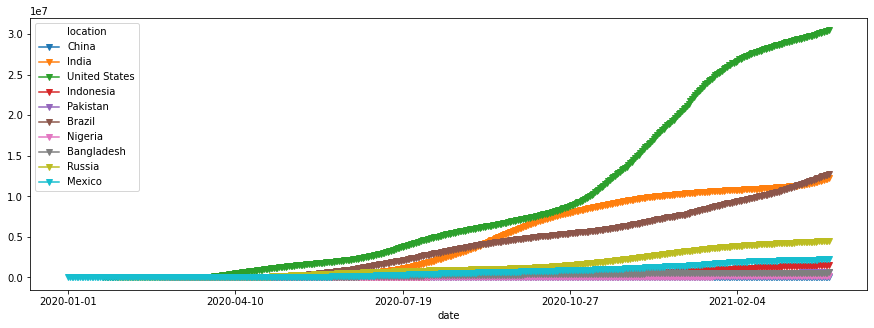

In [8]:
countries.plot(marker="v",figsize=(15,5))

The plot below also shows daily cases, but with resampling by month.

In [9]:
countries = countries.set_index(pd.to_datetime(countries.index))


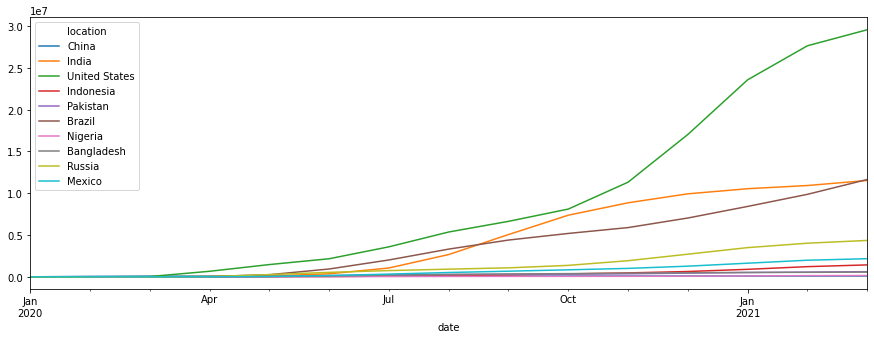

In [10]:
countries.resample('M').mean().plot(figsize = (15,5))

### Map of total cases by country

The new dataframe contains total cases by grouped by country.

In [11]:
totals = subset1[['total_cases', 'location']].groupby('location').sum().reset_index()

colors = 9
cmap = 'Blues'
figsize = (16, 10)
year = '2019'
cols = ['Country Name', year]

In order to create a map in geopandas, I imported a shapefile from Natural Earth with polygons for each country.

In [12]:
test = 'ne_10m_admin_0_countries.shp'

gpd.read_file(test)

gdf = gpd.read_file('ne_10m_admin_0_countries.shp')[['SOVEREIGNT', 'geometry']].to_crs('+proj=robin')
gdf.sample(5)

,SOVEREIGNT,geometry
88,Eritrea,"MULTIPOLYGON (((4044297.703 1359135.650, 40243..."
95,Liechtenstein,"POLYGON ((795037.289 5042278.553, 795842.797 5..."
196,Grenada,"MULTIPOLYGON (((-5782165.589 1306356.010, -578..."
174,Denmark,"MULTIPOLYGON (((-2930846.058 6825537.453, -293..."
153,United States of America,"MULTIPOLYGON (((-7836976.850 5261589.018, -783..."


The columns SOVEREIGNT and location in respective datasets both contain the name of the country. The next step is to perform a merge of the two datasets.

In [13]:
merged = gdf.merge(totals, left_on= 'SOVEREIGNT', right_on = 'location')

merged.head()

,SOVEREIGNT,geometry,location,total_cases
0,Indonesia,"MULTIPOLYGON (((11108970.260 445285.130, 11108...",Indonesia,166994097.0
1,Malaysia,"MULTIPOLYGON (((11108970.260 445285.130, 11108...",Malaysia,28672066.0
2,Chile,"MULTIPOLYGON (((-6477059.899 -1872360.838, -64...",Chile,162925591.0
3,Bolivia,"POLYGON ((-6477059.899 -1872360.838, -6477072....",Bolivia,43103860.0
4,Peru,"MULTIPOLYGON (((-6477059.899 -1872360.838, -64...",Peru,256326552.0


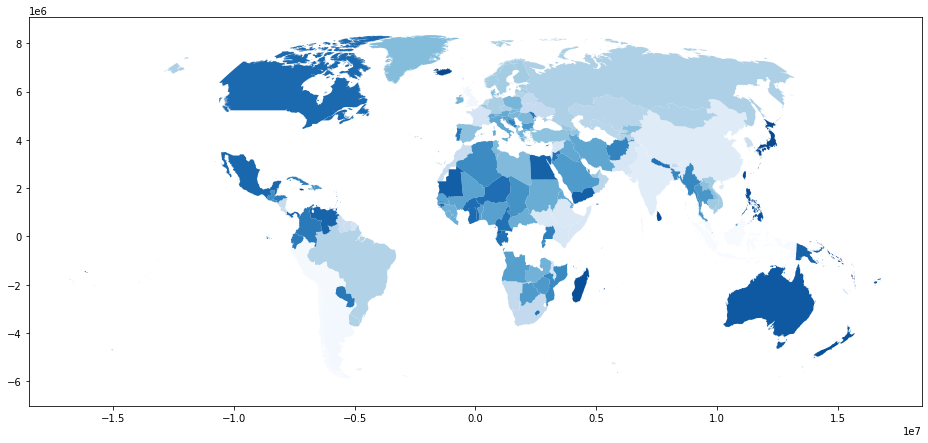

In [14]:
ax = merged.dropna().plot(cmap=cmap, figsize = figsize, scheme = 'equal_interval', k = colors, legend = True)

### Insights

Not all the values from this dataset are actual countries, some are continents or regions. From this list the countries with the highest number of cases over the course of the pandemic are: 

- United States
- India
- Brazil
- Russia
- France
- United Kingdom
- Spain
- Italy
- Turkey
- Colombia


In [15]:
totals.sort_values('total_cases', ascending = False).head()

,location,total_cases
211,World,1.736305e+10
143,North America,4.807592e+09
63,Europe,4.642085e+09
10,Asia,4.246183e+09
204,United States,4.149563e+09


In [16]:
top10 = ['United States', 'India', 'Brazil', 'Russia', 'France', 'United Kingdom', 'Spain', 'Italy', 'Turkey', 'Colombia']

In [17]:
top_ten = df[df['location'].isin(top10)]

Data is formated same as above by use of a pivot table.

In [18]:
table_ten = pd.pivot_table(top_ten, values='total_cases', index='date',
                    columns=['location'], aggfunc=np.sum)

In [19]:
table_ten.head()

location,Brazil,Colombia,France,India,Italy,Russia,Spain,Turkey,United Kingdom,United States
date,,,,,,,,,,
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2020-01-24,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2020-01-25,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2020-01-26,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0


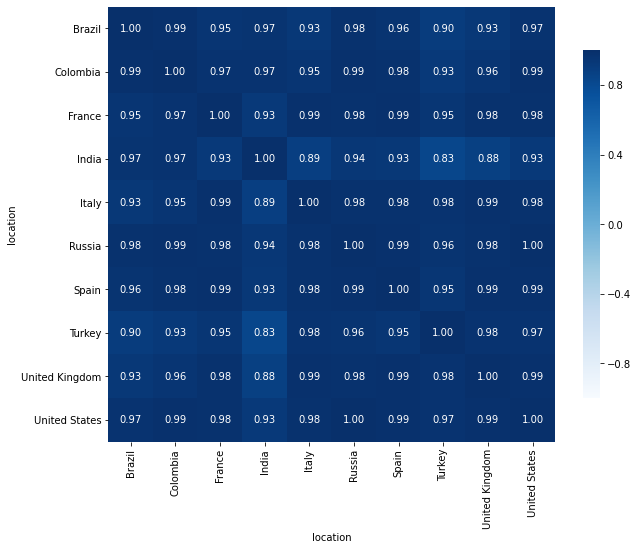

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
# mask
#mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
#mask = mask[1:, :-1]
corr = table_ten.corr()
# plot heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

Looking at the sum of the cases does not yield anything very interesting. The sum of the cases is obviously very correlated among all countries, all cases have been increasing over the course of the pandemic. 

## New Cases

A lot more insight about different trajectories and approaches can be gathered by looking at the new cases.

In [21]:
top_ten.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
10077,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
10078,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
10079,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
10080,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
10081,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


In [22]:
new_cases = pd.pivot_table(top_ten, values='new_cases', index='date',
                    columns=['location'], aggfunc=np.sum)

In [23]:
new_cases.head()

location,Brazil,Colombia,France,India,Italy,Russia,Spain,Turkey,United Kingdom,United States
date,,,,,,,,,,
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-01-24,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2020-01-25,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-01-26,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0


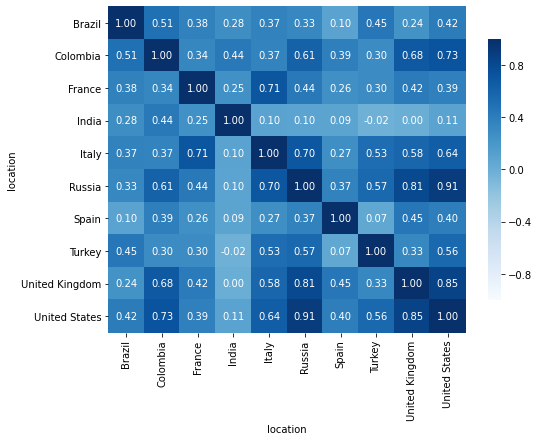

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))
# mask
#mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
#mask = mask[1:, :-1]
corr = new_cases.corr()
# plot heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

Looking at the correlation between countries for new daily new cases already gives us more information than the first heat map. We can see that some countries, like the United States and the United Kingdom, are highly correlated. Other countries have low correlations across the board (for example: India). This is likely because a different approach to combat the pandemic was taken. 


Perhaps looking at correlations of weekly cases will give more insight into similar trajectories.

In [25]:
weeks = new_cases.reset_index()
weeks.head()

location,date,Brazil,Colombia,France,India,Italy,Russia,Spain,Turkey,United Kingdom,United States
0,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2020-01-24,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,2020-01-25,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,2020-01-26,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [26]:
weeks.index = pd.to_datetime(weeks['date'])
weeks = weeks.drop('date', axis =1)

In [27]:
weeks.head()

location,Brazil,Colombia,France,India,Italy,Russia,Spain,Turkey,United Kingdom,United States
date,,,,,,,,,,
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-01-24,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2020-01-25,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-01-26,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0


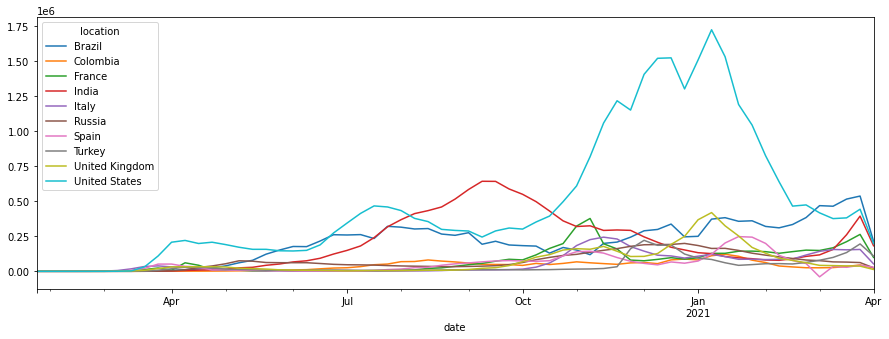

In [28]:
weekly = weeks.resample('W').sum()
weekly.plot(figsize = (15,5))


There is a sudden drop of cases in the last week. This is because the week of April 4th is incomplete, and should be removed.

In [29]:
weekly = weekly[:-1]

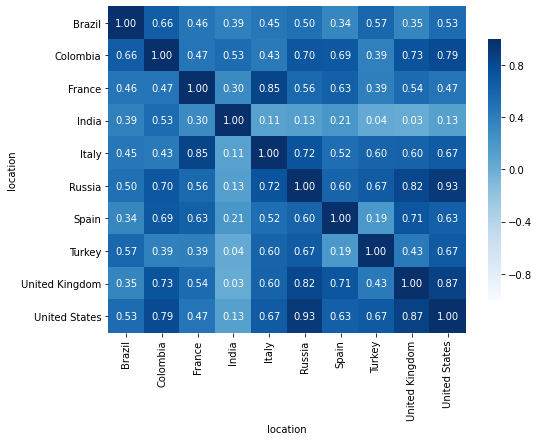

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))
# mask
#mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
#mask = mask[1:, :-1]
corr = weekly.corr()
# plot heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

Similar trends correlation-wise remain when the dataset is resampled by week. 

## Days since 200 cases

The virus was introduced to different countries at different times, which is why peaks of countries with similar strategies are not in sync. A better measure of how different countries' strategies would be shifting the curves to a common starting point: the day the country hit 200 cases.

For the top ten countries:


In [31]:
print(top10)
print(new_cases.shape)

['United States', 'India', 'Brazil', 'Russia', 'France', 'United Kingdom', 'Spain', 'Italy', 'Turkey', 'Colombia']
(435, 10)


In [32]:
table_ten.head()

location,Brazil,Colombia,France,India,Italy,Russia,Spain,Turkey,United Kingdom,United States
date,,,,,,,,,,
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2020-01-24,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2020-01-25,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2020-01-26,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [34]:
table_ten = table_ten.reset_index()

I created a new Series for each country from the sum of cases table_ten dataframe.

In [35]:
Brazil = table_ten[['Brazil', 'date']]
India = table_ten[['India', 'date']]
US = table_ten[['United States', 'date']]
Russia = table_ten[['Russia', 'date']]
France = table_ten[['France', 'date']]
UK = table_ten[['United Kingdom', 'date']]
Spain = table_ten[['Spain', 'date']]
Italy = table_ten[['Italy', 'date']]
Turkey = table_ten[['Turkey', 'date']]
Colombia = table_ten[['Colombia', 'date']]

I filtered each of the series based on only having more than 200 cases.

In [36]:
Brazil_df = Brazil.dropna().loc[Brazil['Brazil'] > 200] 
Brazil_df = Brazil_df.reset_index()
Brazil_df.head()

location,index,Brazil,date
0,55,321.0,2020-03-17
1,56,372.0,2020-03-18
2,57,621.0,2020-03-19
3,58,793.0,2020-03-20
4,59,1021.0,2020-03-21


In [37]:
UK_df = UK.dropna().loc[UK['United Kingdom']>200]
UK_df = UK_df.reset_index()

In [38]:
India_df = India.dropna().loc[India['India'] > 200] 
India_df = India_df.reset_index()
India_df.head()

location,index,India,date
0,58,244.0,2020-03-20
1,59,330.0,2020-03-21
2,60,396.0,2020-03-22
3,61,499.0,2020-03-23
4,62,536.0,2020-03-24


In [39]:
US_df = US.dropna().loc[US['United States']> 200]
US_df = US_df.reset_index()
US_df.head()

location,index,United States,date
0,44,237.0,2020-03-06
1,45,403.0,2020-03-07
2,46,519.0,2020-03-08
3,47,594.0,2020-03-09
4,48,782.0,2020-03-10


I merged each of these dataframes on the index, and looked at the results to determine which was the first date in each dataframe.

In [40]:
merged = pd.merge(India_df,US_df, left_index = True, right_index = True)

In [41]:
merged.head()

location,index_x,India,date_x,index_y,United States,date_y
0,58,244.0,2020-03-20,44,237.0,2020-03-06
1,59,330.0,2020-03-21,45,403.0,2020-03-07
2,60,396.0,2020-03-22,46,519.0,2020-03-08
3,61,499.0,2020-03-23,47,594.0,2020-03-09
4,62,536.0,2020-03-24,48,782.0,2020-03-10


Text(0.5, 1.0, 'Cummulative Distribution of cases since hitting 200 case mark')

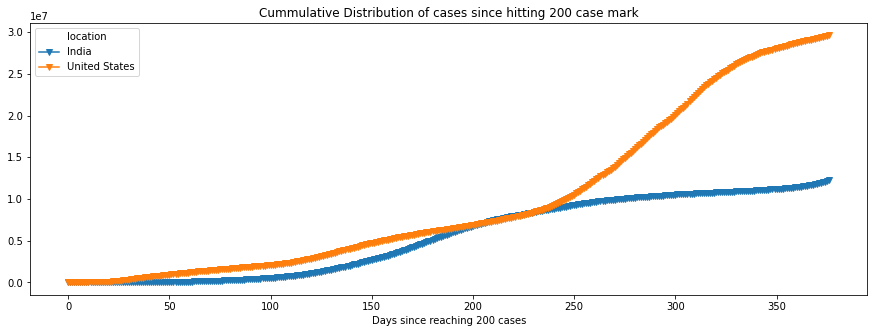

In [42]:
merged[['India', 'United States']].plot(marker="v",figsize=(15,5))

plt.xlabel("Days since reaching 200 cases")
plt.title('Cummulative Distribution of cases since hitting 200 case mark')

In [43]:
new_US = new_cases['United States'].loc[new_cases.index >= '2020-03-06']
new_US = new_US.reset_index()
new_US.head()

,date,United States
0,2020-03-06,53.0
1,2020-03-07,166.0
2,2020-03-08,116.0
3,2020-03-09,75.0
4,2020-03-10,188.0


In [44]:
new_India = new_cases['India'].loc[new_cases.index >= '2020-03-20']
new_India = new_India.reset_index()
new_India.head()

,date,India
0,2020-03-20,50.0
1,2020-03-21,86.0
2,2020-03-22,66.0
3,2020-03-23,103.0
4,2020-03-24,37.0


In [45]:
new_merge = pd.merge(new_US, new_India, left_index = True, right_index = True)

Text(0.5, 1.0, 'New Cases in US and India since hitting 200 case mark')

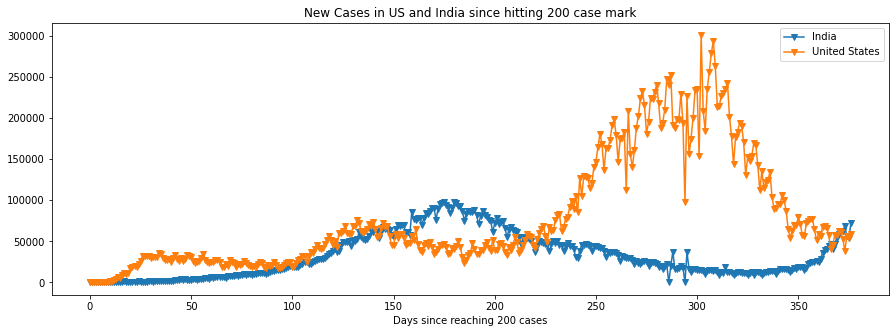

In [46]:
new_merge[['India', 'United States']].plot(marker="v",figsize=(15,5))

plt.xlabel("Days since reaching 200 cases")
plt.title("New Cases in US and India since hitting 200 case mark")

The trajectories are not that similar after all. 

Text(0.5, 1.0, 'Cummulative Distribution of cases since hitting 200 case mark')

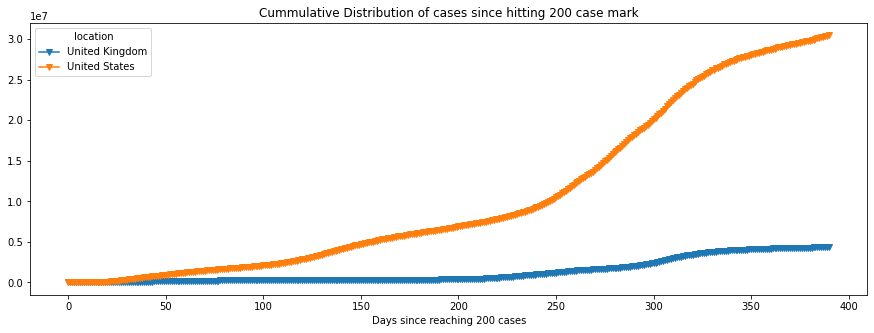

In [47]:
merged_USUK = pd.merge(US_df,UK_df, left_index = True, right_index = True)
merged_USUK[['United Kingdom', 'United States']].plot(marker="v",figsize=(15,5))

plt.xlabel("Days since reaching 200 cases")
plt.title('Cummulative Distribution of cases since hitting 200 case mark')

In [48]:
merged_USUK.head()

location,index_x,United States,date_x,index_y,United Kingdom,date_y
0,44,237.0,2020-03-06,42,246.0,2020-03-04
1,45,403.0,2020-03-07,43,295.0,2020-03-05
2,46,519.0,2020-03-08,44,374.0,2020-03-06
3,47,594.0,2020-03-09,45,429.0,2020-03-07
4,48,782.0,2020-03-10,46,483.0,2020-03-08


We can see the date at which both countries hit the 200 case mark is within two days of each other ( March 4th vs March 6th. )

In [49]:
new_UK = new_cases['United Kingdom'].loc[new_cases.index >= '2020-03-04']
new_UK = new_UK.reset_index()

In [50]:
new_merge_USUK = pd.merge(new_US, new_UK, left_index = True, right_index = True)

Text(0.5, 1.0, 'New Cases in US and UK since hitting 200 case mark')

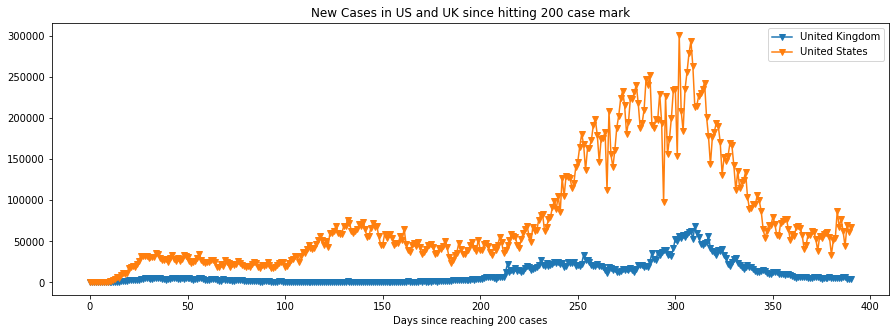

In [51]:
new_merge_USUK[['United Kingdom', 'United States']].plot(marker="v",figsize=(15,5))

plt.xlabel("Days since reaching 200 cases")
plt.title("New Cases in US and UK since hitting 200 case mark")

Here we can see the correlation remains very strong. Although the UK has considerably less cases, the trajectory of new cases is similar. This signals at a similar strategy of mitigating the pandemic.